<a href="https://colab.research.google.com/github/smg0218/BigData/blob/main/PBL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

import sys

!sudo add-apt-repository ppa:saiarcot895/chromium-beta #실행 결과에서 Enter 입력
!sudo apt remove chromium-browser
!sudo snap remove chromium
!sudo apt install chromium-browser

!pip3 install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys

service = Service(executable_path=r'/usr/bin/chromedriver')
options = webdriver.ChromeOptions()
options.add_argument('--headless') #창이 나타나지 않도록 Headless 설정하기
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
#options.add_argument('--blink-settings=imagesEnabled=false') #이미지 안뜨게
driver = webdriver.Chrome(service=service, options=options)

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/saiarcot895/chromium-beta/ubuntu/ jammy main'
Description:
This PPA contains the latest Chromium Beta builds, with hardware video decoding enabled (hidden behind a flag), and support for Widevine (needed for viewing many DRM-protected videos) enabled.

== Hardware Video Decoding ==

To enable hardware video decoding, start Chromium with the --enable-features=VaapiVideoDecoder argument. To make this persistent, create a file at /etc/chromium-browser/customizations/92-vaapi-hardware-decoding with the following contents:

CHROMIUM_FLAGS="${CHROMIUM_FLAGS} --enable-features=VaapiVideoDecoder"

See also https://wiki.archlinux.org/title/Chromium#Hardware_video_acceleration for more information on VAAPI video decoding support.

=== Widevine Support ===

The packages in this PPA have support for Widevine inside Chromium enabled. However, you still need to copy some files from 

# 새 섹션

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
#2020년
url = 'https://insights.stackoverflow.com/survey/2020#most-popular-technologies'

driver.get(url)

from logging import exception
columns = ['순위', '이름', '퍼센트']
rank2020 = []
name2020 = []
percent2020 = []
for i in range (1, 26):
  try:
    rank2020.append(i)
    name2020.append(driver.find_element(By.CSS_SELECTOR, '#technology-programming-scripting-and-markup-languages-all-respondents > table > tbody > tr:nth-child(' + str(i) + ') > td.label.lh-sm').text + '0')
    percent2020.append(driver.find_element(By.CSS_SELECTOR, '#technology-programming-scripting-and-markup-languages-all-respondents > table > tbody > tr:nth-child(' + str(i) + ') > td.bar > span').text)
  except:
    break

print(rank2020)
print(name2020)
print(percent2020)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
['JavaScript0', 'HTML/CSS0', 'SQL0', 'Python0', 'Java0', 'Bash/Shell/PowerShell0', 'C#0', 'PHP0', 'TypeScript0', 'C++0', 'C0', 'Go0', 'Kotlin0', 'Ruby0', 'Assembly0', 'VBA0', 'Swift0', 'R0', 'Rust0', 'Objective-C0', 'Dart0', 'Scala0', 'Perl0', 'Haskell0', 'Julia0']
['67.7%', '63.1%', '54.7%', '44.1%', '40.2%', '33.1%', '31.4%', '26.2%', '25.4%', '23.9%', '21.8%', '8.8%', '7.8%', '7.1%', '6.2%', '6.1%', '5.9%', '5.7%', '5.1%', '4.1%', '4.0%', '3.6%', '3.1%', '2.1%', '0.9%']


In [ ]:
#2020년 csv 출력
import pandas as pd
df2020 = pd.DataFrame({columns[0]: rank2020,
                   columns[1]: name2020,
                   columns[2]: percent2020}, columns=columns)

df2020.head(25)

df2020.to_csv('useLanguage_2020.csv', index=False)

In [ ]:
#2021년
url = 'https://insights.stackoverflow.com/survey/2021#technology-most-popular-technologies'

driver.get(url)

from logging import exception
columns = ['순위', '이름', '퍼센트']
rank2021 = []
name2021 = []
percent2021 = []
for i in range (1, 26):
  try:
    rank2021.append(i)
    name2021.append(driver.find_element(By.CSS_SELECTOR, '#language > tbody > tr:nth-child(' + str(i) + ') > td.label.lh-sm').text + '1')
    percent2021.append(driver.find_element(By.CSS_SELECTOR, '#language > tbody > tr:nth-child(' + str(i) + ') > td.bar > span.js-bar-unit.js-bar-unit--label').text)
  except:
    break

print(rank2021)
print(name2021)
print(percent2021)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
['JavaScript1', 'HTML/CSS1', 'Python1', 'SQL1', 'Java1', 'Node.js1', 'TypeScript1', 'C#1', 'Bash/Shell1', 'C++1', 'PHP1', 'C1', 'PowerShell1', 'Go1', 'Kotlin1', 'Rust1', 'Ruby1', 'Dart1', 'Assembly1', 'Swift1', 'R1', 'VBA1', 'Matlab1', 'Groovy1', 'Objective-C1']
['64.96%', '56.07%', '48.24%', '47.08%', '35.35%', '33.91%', '30.19%', '27.86%', '27.13%', '24.31%', '21.98%', '21.01%', '10.75%', '9.55%', '8.32%', '7.03%', '6.75%', '6.02%', '5.61%', '5.1%', '5.07%', '4.66%', '4.66%', '3.01%', '2.8%']


In [ ]:
#2021년 csv 출력
df2021 = pd.DataFrame({columns[0]: rank2021,
                   columns[1]: name2021,
                   columns[2]: percent2021}, columns=columns)

df2021.head(25)

df2021.to_csv('useLanguage_2021.csv', index=False)

In [ ]:
#2022년
url = 'https://survey.stackoverflow.co/2022/#technology-most-popular-technologies'

driver.get(url)

from logging import exception
columns = ['순위', '이름', '퍼센트']
rank2022 = []
name2022 = []
percent2022 = []
for i in range (1, 26):
  try:
    rank2022.append(i)
    name2022.append(driver.find_element(By.CSS_SELECTOR, '#languageqmfte > tbody > tr:nth-child(' + str(i) + ') > td.label.lh-sm').text + '2')
    percent2022.append(driver.find_element(By.CSS_SELECTOR, '#languageqmfte > tbody > tr:nth-child(' + str(i) + ') > td.bar > span.js-bar-unit.js-bar-unit--label').text)
  except:
    break

print(rank2022)
print(name2022)
print(percent2022)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
['JavaScript2', 'HTML/CSS2', 'SQL2', 'Python2', 'TypeScript2', 'Java2', 'Bash/Shell2', 'C#2', 'C++2', 'PHP2', 'C2', 'PowerShell2', 'Go2', 'Rust2', 'Kotlin2', 'Dart2', 'Ruby2', 'Assembly2', 'Swift2', 'R2', 'VBA2', 'MATLAB2', 'Lua2', 'Groovy2', 'Delphi2']
['65.36%', '55.08%', '49.43%', '48.07%', '34.83%', '33.27%', '29.07%', '27.98%', '22.55%', '20.87%', '19.27%', '12.07%', '11.15%', '9.32%', '9.16%', '6.54%', '6.05%', '5.47%', '4.91%', '4.66%', '4.48%', '4.1%', '4.03%', '3.32%', '3.25%']


In [ ]:
#2022년 csv 출력
df2022 = pd.DataFrame({columns[0]: rank2022,
                   columns[1]: name2022,
                   columns[2]: percent2022}, columns=columns)

df2022.head(25)

df2022.to_csv('useLanguage_2022.csv', index=False)

In [ ]:
#2023년
url = 'https://survey.stackoverflow.co/2023/#technology-most-popular-technologies'

driver.get(url)

from logging import exception
columns = ['순위', '이름', '퍼센트']
rank2023 = []
name2023 = []
percent2023 = []
for i in range (1, 26):
  try:
    rank2023.append(i)
    name2023.append(driver.find_element(By.CSS_SELECTOR, '#languageere2c > tbody > tr:nth-child(' + str(i) + ') > td.label.lh-sm').text + '3')
    percent2023.append(driver.find_element(By.CSS_SELECTOR, '#languageere2c > tbody > tr:nth-child(' + str(i) + ') > td.bar > span.js-bar-unit.js-bar-unit--label').text)

  except:
    break

print(rank2023)
print(name2023)
print(percent2023)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
['JavaScript3', 'HTML/CSS3', 'Python3', 'SQL3', 'TypeScript3', 'Bash/Shell (all shells)3', 'Java3', 'C#3', 'C++3', 'C3', 'PHP3', 'PowerShell3', 'Go3', 'Rust3', 'Kotlin3', 'Ruby3', 'Lua3', 'Dart3', 'Assembly3', 'Swift3', 'R3', 'Visual Basic (.Net)3', 'MATLAB3', 'VBA3', 'Groovy3']
['63.61%', '52.97%', '49.28%', '48.66%', '38.87%', '32.37%', '30.55%', '27.62%', '22.42%', '19.34%', '18.58%', '13.59%', '13.24%', '13.05%', '9.06%', '6.23%', '6.09%', '6.02%', '5.43%', '4.65%', '4.23%', '4.07%', '3.81%', '3.55%', '3.4%']


In [ ]:
#2023년 csv 출력
df2023 = pd.DataFrame({columns[0]: rank2023,
                   columns[1]: name2023,
                   columns[2]: percent2023}, columns=columns)

df2023.head(25)

df2023.to_csv('useLanguage_2023.csv', index=False)

In [ ]:
import pandas as pd
columnsAll = ['순위', '2020이름', '2020퍼센트', '2021이름', '2021퍼센트', '2022이름', '2022퍼센트', '2023이름', '2023퍼센트']
dfAll = pd.DataFrame({columnsAll[0]: rank2021,
                      columnsAll[1]: name2020,
                      columnsAll[2]: percent2020,
                      columnsAll[3]: name2021,
                      columnsAll[4]: percent2021,
                      columnsAll[5]: name2022,
                      columnsAll[6]: percent2022,
                      columnsAll[7]: name2023,
                      columnsAll[8]: percent2023}, columns=columnsAll)

dfAll.to_csv('wantedLanguage_All.csv', index=False)

In [ ]:
dfAll

,순위,2020이름,2020퍼센트,2021이름,2021퍼센트,2022이름,2022퍼센트,2023이름,2023퍼센트
0,1,JavaScript0,67.7%,JavaScript1,64.96%,JavaScript2,65.36%,JavaScript3,63.61%
1,2,HTML/CSS0,63.1%,HTML/CSS1,56.07%,HTML/CSS2,55.08%,HTML/CSS3,52.97%
2,3,SQL0,54.7%,Python1,48.24%,SQL2,49.43%,Python3,49.28%
3,4,Python0,44.1%,SQL1,47.08%,Python2,48.07%,SQL3,48.66%
4,5,Java0,40.2%,Java1,35.35%,TypeScript2,34.83%,TypeScript3,38.87%
5,6,Bash/Shell/PowerShell0,33.1%,Node.js1,33.91%,Java2,33.27%,Bash/Shell (all shells)3,32.37%
6,7,C#0,31.4%,TypeScript1,30.19%,Bash/Shell2,29.07%,Java3,30.55%
7,8,PHP0,26.2%,C#1,27.86%,C#2,27.98%,C#3,27.62%
8,9,TypeScript0,25.4%,Bash/Shell1,27.13%,C++2,22.55%,C++3,22.42%
9,10,C++0,23.9%,C++1,24.31%,PHP2,20.87%,C3,19.34%


In [ ]:
#2020~2023년 csv 출력

dfAll.to_csv('useLanguage_All.csv', index=False)

In [ ]:
dfAll.loc[0:10]

,2020이름,2020퍼센트,2021이름,2021퍼센트,2022이름,2022퍼센트,2023이름,2023퍼센트
순위,,,,,,,,
1,JavaScript0,67.7%,JavaScript1,64.96%,JavaScript2,65.36%,JavaScript3,63.61%
2,HTML/CSS0,63.1%,HTML/CSS1,56.07%,HTML/CSS2,55.08%,HTML/CSS3,52.97%
3,SQL0,54.7%,Python1,48.24%,SQL2,49.43%,Python3,49.28%
4,Python0,44.1%,SQL1,47.08%,Python2,48.07%,SQL3,48.66%
5,Java0,40.2%,Java1,35.35%,TypeScript2,34.83%,TypeScript3,38.87%
6,Bash/Shell/PowerShell0,33.1%,Node.js1,33.91%,Java2,33.27%,Bash/Shell (all shells)3,32.37%
7,C#0,31.4%,TypeScript1,30.19%,Bash/Shell2,29.07%,Java3,30.55%
8,PHP0,26.2%,C#1,27.86%,C#2,27.98%,C#3,27.62%
9,TypeScript0,25.4%,Bash/Shell1,27.13%,C++2,22.55%,C++3,22.42%


In [ ]:
df2020 = df2020.set_index('순위')
df2021 = df2021.set_index('순위')
df2022 = df2022.set_index('순위')
df2023 = df2023.set_index('순위')
dfAll = dfAll.set_index('순위')

In [ ]:
df2020Top10 = df2020.loc[0:10]
df2021Top10 = df2021.loc[0:10]
df2022Top10 = df2022.loc[0:10]
df2023Top10 = df2023.loc[0:10]
result1 = pd.concat([df2020Top10,df2021Top10],ignore_index=True)
result2 = pd.concat([df2021Top10,df2022Top10],ignore_index=True)
result3 = pd.concat([df2022Top10,df2023Top10],ignore_index=True)
resultAll = pd.concat([df2020Top10, df2021Top10, df2022Top10, df2023Top10], ignore_index=True)
result1 = result1.sort_values('이름')
result2 = result2.sort_values('이름')
result3 = result3.sort_values('이름')
resultAll = resultAll.sort_values('이름')
result1['퍼센트'] = result1['퍼센트'].str.replace('%', '')
result1['퍼센트'] = result1['퍼센트'].astype('double')
result2['퍼센트'] = result2['퍼센트'].str.replace('%', '')
result2['퍼센트'] = result2['퍼센트'].astype('double')
result3['퍼센트'] = result3['퍼센트'].str.replace('%', '')
result3['퍼센트'] = result3['퍼센트'].astype('double')
resultAll['퍼센트'] = resultAll['퍼센트'].str.replace('%', '')
resultAll['퍼센트'] = resultAll['퍼센트'].astype('double')

In [ ]:
#2021년에만 있는 데이터인 Node.js 삭제
#result1 = result1.drop([15], axis = 0)
#2020년에만 상위 10위에 든 PHP의 2021년데이터 추가
#result1 = result1.append({"이름":"PHP1","퍼센트":"21.98"}, ignore_index=True)
#2023년에만 상위 10위에 든 C의 2020년, 2021년 데이터 추가
#result1 = result1.append({"이름":"C0","퍼센트":"21.8"}, ignore_index=True)
#result1 = result1.append({"이름":"C1","퍼센트":"21.01"}, ignore_index=True)
#이름 순으로 정렬
result1 = result1.sort_values('이름')
result1

<ipython-input-15-835c945a0091>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result1 = result1.append({"이름":"PHP1","퍼센트":"21.98"}, ignore_index=True)
<ipython-input-15-835c945a0091>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result1 = result1.append({"이름":"C0","퍼센트":"21.8"}, ignore_index=True)
<ipython-input-15-835c945a0091>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result1 = result1.append({"이름":"C1","퍼센트":"21.01"}, ignore_index=True)


,이름,퍼센트
0,Bash/Shell/PowerShell0,33.1
1,Bash/Shell1,27.13
2,C#0,31.4
3,C#1,27.86
4,C++0,23.9
5,C++1,24.31
20,C0,21.8
21,C1,21.01
6,HTML/CSS0,63.1
7,HTML/CSS1,56.07


In [ ]:
#2021년에만 있는 데이터인 Node.js 삭제
#result2 = result2.drop([5], axis = 0)
#2022년에만 상위 10위에 든 PHP의 2021년데이터 추가
#result2 = result2.append({"이름":"PHP1","퍼센트":"21.98"}, ignore_index=True)
#2023년에만 상위 10위에 든 C의 2021년, 2022년데이터 추가
#result2 = result2.append({"이름":"C1","퍼센트":"21.01"}, ignore_index=True)
#result2 = result2.append({"이름":"C2","퍼센트":"19.27"}, ignore_index=True)
#이름 순으로 정렬
result2 = result2.sort_values('이름')
result2

,이름,퍼센트
0,Bash/Shell1,27.13
1,Bash/Shell2,29.07
2,C#1,27.86
3,C#2,27.98
4,C++1,24.31
5,C++2,22.55
20,C1,21.01
21,C2,19.27
6,HTML/CSS1,56.07
7,HTML/CSS2,55.08


In [ ]:
#2022년에만 상위 10위에 든 PHP의 2023년데이터 추가
#result3 = result3.append({"이름":"PHP3","퍼센트":"18.58"}, ignore_index=True)
#2023년에만 상위 10위에 든 C의 2022년데이터 추가
#result3 = result3.append({"이름":"C2","퍼센트":"19.27"}, ignore_index=True)
#이름 순으로 정렬
result3 = result3.sort_values('이름')
result3

<ipython-input-18-9e75acf8b00f>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result3 = result3.append({"이름":"PHP3","퍼센트":"18.58"}, ignore_index=True)
<ipython-input-18-9e75acf8b00f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result3 = result3.append({"이름":"C2","퍼센트":"19.27"}, ignore_index=True)


,이름,퍼센트
0,Bash/Shell (all shells)3,32.37
1,Bash/Shell2,29.07
2,C#2,27.98
3,C#3,27.62
4,C++2,22.55
5,C++3,22.42
21,C2,19.27
6,C3,19.34
7,HTML/CSS2,55.08
8,HTML/CSS3,52.97


In [ ]:
#2021년에만 있는 데이터인 Node.js 삭제
#resultAll = resultAll.drop([15], axis = 0)
#PHP의 2021년, 2023년데이터 추가
#resultAll = resultAll.append({"이름":"PHP1","퍼센트":"21.98"}, ignore_index=True)
#resultAll = resultAll.append({"이름":"PHP3","퍼센트":"18.58"}, ignore_index=True)
#C의 2020년, 2021년, 2022년데이터 추가
#resultAll = resultAll.append({"이름":"C0","퍼센트":"21.8"}, ignore_index=True)
#resultAll = resultAll.append({"이름":"C1","퍼센트":"21.01"}, ignore_index=True)
#resultAll = resultAll.append({"이름":"C2","퍼센트":"19.27"}, ignore_index=True)
#이름 순으로 정렬
resultAll = resultAll.sort_values('이름')
resultAll

<ipython-input-19-c39fdacb5df5>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultAll = resultAll.append({"이름":"PHP1","퍼센트":"21.98"}, ignore_index=True)
<ipython-input-19-c39fdacb5df5>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultAll = resultAll.append({"이름":"PHP3","퍼센트":"18.58"}, ignore_index=True)
<ipython-input-19-c39fdacb5df5>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultAll = resultAll.append({"이름":"C0","퍼센트":"21.8"}, ignore_index=True)
<ipython-input-19-c39fdacb5df5>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultAll = resultAll.append({"이름":"C1","퍼센트":"21.01"}, ignore_index=True)
<ipython-input-19

,이름,퍼센트
0,Bash/Shell (all shells)3,32.37
1,Bash/Shell/PowerShell0,33.1
2,Bash/Shell1,27.13
3,Bash/Shell2,29.07
4,C#0,31.4
5,C#1,27.86
6,C#2,27.98
7,C#3,27.62
8,C++0,23.9
9,C++1,24.31


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#숫자만 추출하기 위해서 임포트
import re

#한글 사용을 위한 폰트지정
plt.rcParams['font.family'] = 'NanumGothic'

#2020 ~ 2022의 퍼센트 정보를 넣기
languageName = []
value2020 = []
value2021 = []
value2022 = []
value2023 = []
#숫자를 제거하기 위한 변수 테이블
translation_table = str.maketrans('', '', '1234567890')

for i in range(0, resultAll.shape[0]):
  row = resultAll.iloc[i]
  idx = resultAll.index[i]
  resultNumber = re.sub(r'[^0-9]', '', row[0])
  if(resultNumber == '0') :
    resultText = row[0].translate(translation_table)
    languageName.append(resultText)
    value2020.append(round(float(row[1]),2))
  elif(resultNumber == '1') :
    value2021.append(round(float(row[1]),2))
  elif(resultNumber == '2') :
    value2022.append(round(float(row[1]),2))
  elif(resultNumber == '3') :
    value2023.append(round(float(row[1]),2))

languageName[0] = "Bash/Shell"
print(languageName)
print(value2020)
print(value2021)
print(value2022)
print(value2023)

['Bash/Shell', 'C#', 'C++', 'C', 'HTML/CSS', 'Java', 'JavaScript', 'PHP', 'Python', 'SQL', 'TypeScript']
[33.1, 31.4, 23.9, 21.8, 63.1, 40.2, 67.7, 26.2, 44.1, 54.7, 25.4]
[27.13, 27.86, 24.31, 21.01, 56.07, 35.35, 64.96, 21.98, 48.24, 47.08, 30.19]
[29.07, 27.98, 22.55, 19.27, 55.08, 33.27, 65.36, 20.87, 48.07, 49.43, 34.83]
[32.37, 27.62, 22.42, 19.34, 52.97, 30.55, 63.61, 18.58, 49.28, 48.66, 38.87]


Text(0, 0.5, '퍼센트(%)')

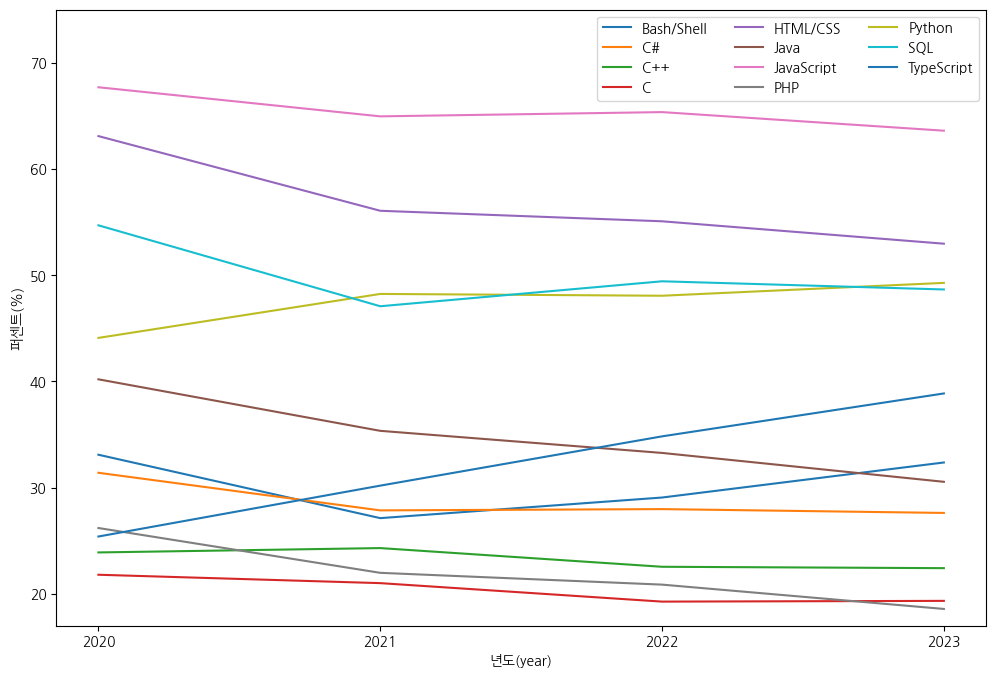

In [ ]:
plt.figure(figsize=(12, 8))
for i,j,k,l, m in zip(languageName,value2020, value2021, value2022, value2023) :
  plt.plot([2020, 2021, 2022, 2023],[j,k,l, m], label=i)

plt.xticks([2020, 2021, 2022, 2023])
plt.ylim([17, 75])
plt.legend(ncols=3)
plt.xlabel('년도(year)')
plt.ylabel('퍼센트(%)')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#2021 - 2020의 퍼센트 차이 구하기
languageName = []
value1 = []
languagePercent = 0.0
#숫자를 제거하기 위한 변수 테이블
translation_table = str.maketrans('', '', '1234567890')
for i in range(0, result1.shape[0]):
  row = result1.iloc[i]
  idx = result1.index[i]
  if(i % 2 == 0) :
    resultText = row[0].translate(translation_table)
    languageName.append(resultText)
    languagePercent = float(row[1])
  else :
    value1.append((round(float(row[1]) - float(languagePercent),2)))
    print(languagePercent, row[1])

print(languageName)
print(value1)

33.1 27.13
31.4 27.86
23.9 24.31
21.8 21.01
63.1 56.07
40.2 35.35
67.7 64.96
26.2 21.98
44.1 48.24
54.7 47.08
25.4 30.19
['Bash/Shell/PowerShell', 'C#', 'C++', 'C', 'HTML/CSS', 'Java', 'JavaScript', 'PHP', 'Python', 'SQL', 'TypeScript']
[-5.97, -3.54, 0.41, -0.79, -7.03, -4.85, -2.74, -4.22, 4.14, -7.62, 4.79]


In [ ]:
#2022 - 2021의 퍼센트 차이 구하기
value2 = []

for i in range(0, result2.shape[0]):
  row = result2.iloc[i]
  idx = result2.index[i]
  if(i % 2 == 0) :
    languagePercent = float(row[1])
  else :
    value2.append((round(float(row[1]) - float(languagePercent),2)))

print(languageName)
print(value2)

['Bash/Shell/PowerShell', 'C#', 'C++', 'C', 'HTML/CSS', 'Java', 'JavaScript', 'PHP', 'Python', 'SQL', 'TypeScript']
[1.94, 0.12, -1.76, -1.74, -0.99, -2.08, 0.4, -1.11, -0.17, 2.35, 4.64]


In [ ]:
#2023 - 2022의 퍼센트 차이 구하기
value3 = []

for i in range(0, result3.shape[0]):
  row = result3.iloc[i]
  idx = result3.index[i]
  if(i % 2 == 0) :
    languagePercent = float(row[1])
  else :
    value3.append((round(float(row[1]) - float(languagePercent),2)))

print(languageName)
print(value3)

['Bash/Shell/PowerShell', 'C#', 'C++', 'C', 'HTML/CSS', 'Java', 'JavaScript', 'PHP', 'Python', 'SQL', 'TypeScript']
[-3.3, -0.36, -0.13, 0.07, -2.11, -2.72, -1.75, -2.29, 1.21, -0.77, 4.04]


In [ ]:
columnsPercent = ['이름', '2021-2020퍼센트', '2022-2021퍼센트', '2023-2022퍼센트']
dfPercent = pd.DataFrame({columnsPercent[0]: languageName,
                          columnsPercent[1]: value1,
                          columnsPercent[2]: value2,
                          columnsPercent[3]: value3}, columns=columnsPercent)

dfPercent.to_csv('languagePercent.csv', index=False)
dfPercent

,이름,2021-2020퍼센트,2022-2021퍼센트,2023-2022퍼센트
0,Bash/Shell/PowerShell,-5.97,1.94,-3.30
1,C#,-3.54,0.12,-0.36
2,C++,0.41,-1.76,-0.13
3,C,-0.79,-1.74,0.07
4,HTML/CSS,-7.03,-0.99,-2.11
5,Java,-4.85,-2.08,-2.72
6,JavaScript,-2.74,0.40,-1.75
7,PHP,-4.22,-1.11,-2.29
8,Python,4.14,-0.17,1.21
9,SQL,-7.62,2.35,-0.77


In [ ]:
dfPercent.sort_values('2021-2020퍼센트', ascending=False)

,이름,2021-2020퍼센트,2022-2021퍼센트,2023-2022퍼센트
10,TypeScript,4.79,4.64,4.04
8,Python,4.14,-0.17,1.21
2,C++,0.41,-1.76,-0.13
3,C,-0.79,-1.74,0.07
6,JavaScript,-2.74,0.40,-1.75
1,C#,-3.54,0.12,-0.36
7,PHP,-4.22,-1.11,-2.29
5,Java,-4.85,-2.08,-2.72
0,Bash/Shell/PowerShell,-5.97,1.94,-3.30
4,HTML/CSS,-7.03,-0.99,-2.11


In [ ]:
dfPercent.sort_values('2022-2021퍼센트', ascending=False)

,이름,2021-2020퍼센트,2022-2021퍼센트,2023-2022퍼센트
10,TypeScript,4.79,4.64,4.04
9,SQL,-7.62,2.35,-0.77
0,Bash/Shell/PowerShell,-5.97,1.94,-3.30
6,JavaScript,-2.74,0.40,-1.75
1,C#,-3.54,0.12,-0.36
8,Python,4.14,-0.17,1.21
4,HTML/CSS,-7.03,-0.99,-2.11
7,PHP,-4.22,-1.11,-2.29
3,C,-0.79,-1.74,0.07
2,C++,0.41,-1.76,-0.13


In [ ]:
dfPercent.sort_values('2023-2022퍼센트', ascending=False)

,이름,2021-2020퍼센트,2022-2021퍼센트,2023-2022퍼센트
10,TypeScript,4.79,4.64,4.04
8,Python,4.14,-0.17,1.21
3,C,-0.79,-1.74,0.07
2,C++,0.41,-1.76,-0.13
1,C#,-3.54,0.12,-0.36
9,SQL,-7.62,2.35,-0.77
6,JavaScript,-2.74,0.40,-1.75
4,HTML/CSS,-7.03,-0.99,-2.11
7,PHP,-4.22,-1.11,-2.29
5,Java,-4.85,-2.08,-2.72


Text(0, 0.5, '증가량(%)')

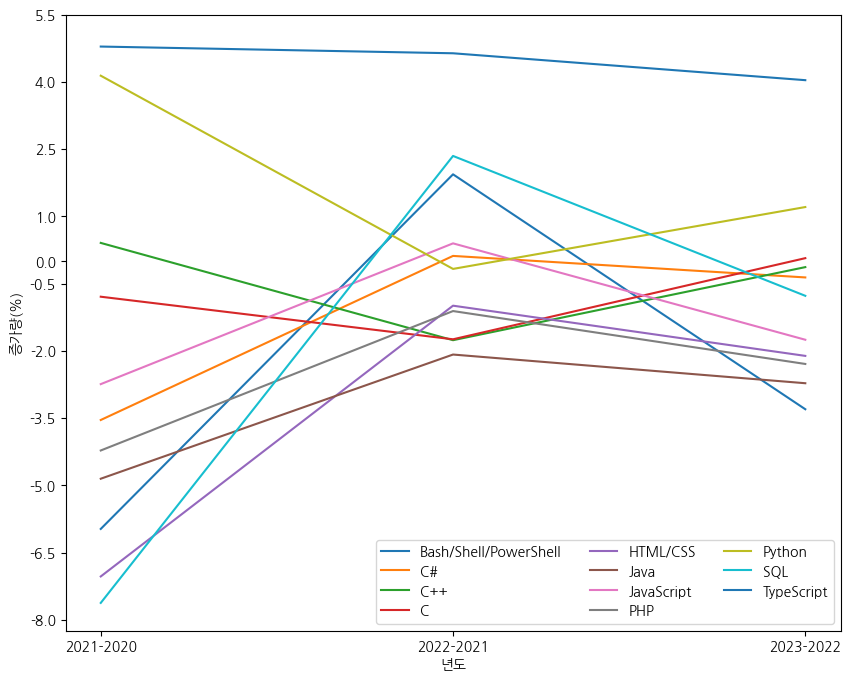

In [ ]:
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 8))
for i,j,k,l in zip(languageName,value1, value2, value3) :
  plt.plot(['2021-2020', '2022-2021', '2023-2022'],[j,k,l], label=i)

plt.xticks(['2021-2020', '2022-2021', '2023-2022'])
plt.yticks([-8, -6.5, -5, -3.5, -2, -0.5, 0, 1, 2.5, 4, 5.5])
plt.legend(ncols=3)
plt.xlabel('년도')
plt.ylabel('증가량(%)')